# Sex and the City lines

In [1]:
# import Python libraries
import pandas as pd
import nltk

import matplotlib as plt
import seaborn as sns; sns.set()

In [2]:
# open the csv file
data = pd.read_csv('SATC_all_lines.csv')
data.head()

,Unnamed: 0,Season,Episode,Speaker,Line,date_job
0,0,1.0,1.0,Carrie,"Once upon a time, an English journalist came t...",NaN
1,1,1.0,1.0,Carrie,Elizabeth was attractive and bright.,NaN
2,2,1.0,1.0,Carrie,Right away she hooked up with one of the city'...,NaN
3,3,1.0,1.0,Tim,The question remains-- Is this really a compan...,NaN
4,4,1.0,1.0,Carrie,"Tim was 42, a well-liked and respected investm...",NaN


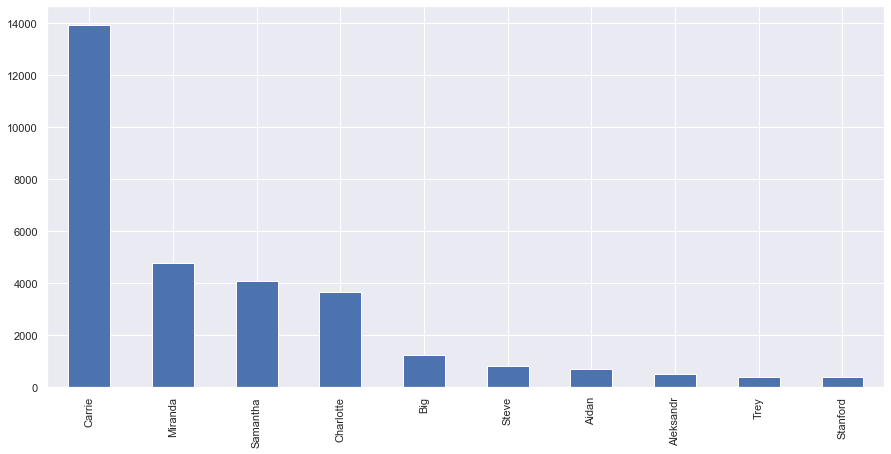

In [3]:
# most talkative characters
data['Speaker'].value_counts()[:10].plot.bar(figsize=(15,7));

## Data cleaning

In [4]:
data.loc[data['date_job'].notnull()]

,Unnamed: 0,Season,Episode,Speaker,Line,date_job
101,101,1.0,1.0,Miranda,"It's like that guy, Jeremiah, the poet.",x
218,218,1.0,1.0,Charlotte,Capote Duncan. He's supposedly some big shot i...,x
368,1,1.0,2.0,Carrie,She was the date of Nick a fairly successful s...,x
501,134,1.0,2.0,Carrie,"Barkley, a notorious modelizer was one of thos...",x
936,189,1.0,3.0,Carrie,Two espressos and a tiramisu later I had learn...,x
...,...,...,...,...,...,...
30663,89,6.0,2.0,Smith,We'd like to get you started with a little amu...,x
32917,450,6.0,6.0,Carrie,Gus Fiansent offered Smith a part of a model /...,x
34050,63,6.0,9.0,Miranda,"So, Robert, you're a doctor for the Knicks?",x
35027,82,6.0,11.0,Robert,- I'm a doctor.,x


In [5]:
data['date_job'].value_counts()

x                             86
Broker                         1
Date's job title mentioned     1
Name: date_job, dtype: int64

In [6]:
del data['date_job']
data.head()

,Unnamed: 0,Season,Episode,Speaker,Line
0,0,1.0,1.0,Carrie,"Once upon a time, an English journalist came t..."
1,1,1.0,1.0,Carrie,Elizabeth was attractive and bright.
2,2,1.0,1.0,Carrie,Right away she hooked up with one of the city'...
3,3,1.0,1.0,Tim,The question remains-- Is this really a compan...
4,4,1.0,1.0,Carrie,"Tim was 42, a well-liked and respected investm..."


In [7]:
del data['Unnamed: 0']
data.head()

,Season,Episode,Speaker,Line
0,1.0,1.0,Carrie,"Once upon a time, an English journalist came t..."
1,1.0,1.0,Carrie,Elizabeth was attractive and bright.
2,1.0,1.0,Carrie,Right away she hooked up with one of the city'...
3,1.0,1.0,Tim,The question remains-- Is this really a compan...
4,1.0,1.0,Carrie,"Tim was 42, a well-liked and respected investm..."


In [8]:
df = data.copy()
df.head()

,Season,Episode,Speaker,Line
0,1.0,1.0,Carrie,"Once upon a time, an English journalist came t..."
1,1.0,1.0,Carrie,Elizabeth was attractive and bright.
2,1.0,1.0,Carrie,Right away she hooked up with one of the city'...
3,1.0,1.0,Tim,The question remains-- Is this really a compan...
4,1.0,1.0,Carrie,"Tim was 42, a well-liked and respected investm..."


## Data overview

## Stop words

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()
text = str(df['Line'])

def tokenizer_porter(Line):
    return [porter.stem(word) for word in text.split()]

tokenizer_porter(text)

['0',
 'onc',
 'upon',
 'a',
 'time,',
 'an',
 'english',
 'journalist',
 'came',
 't...',
 '1',
 'elizabeth',
 'wa',
 'attract',
 'and',
 'bright.',
 '2',
 'right',
 'away',
 'she',
 'hook',
 'up',
 'with',
 'one',
 'of',
 'the',
 "city'...",
 '3',
 'the',
 'question',
 'remains--',
 'Is',
 'thi',
 'realli',
 'a',
 'compan...',
 '4',
 'tim',
 'wa',
 '42,',
 'a',
 'well-lik',
 'and',
 'respect',
 'investm...',
 '...',
 '39994',
 '-',
 "what'",
 'shake',
 'baby?',
 '39995',
 '-',
 "how'",
 'napa?',
 '39996',
 '-',
 'the',
 'hous',
 'is',
 'on',
 'the',
 'market.',
 '39997',
 'look',
 'out',
 'new',
 'york.',
 "i'm",
 'coming.',
 '39998',
 'well,',
 "that'",
 'just',
 'fabulous.',
 'name:',
 'line,',
 'length:',
 '39999,',
 'dtype:',
 'object']

In [11]:
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

# random sentecnce with lot of stop words
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text.split() if not word in stopwords.words('english')]

print(text_tokens)
print(tokens_without_sw)

['0', 'Once', 'upon', 'a', 'time', ',', 'an', 'English', 'journalist', 'came', 't', '...', '1', 'Elizabeth', 'was', 'attractive', 'and', 'bright', '.', '2', 'Right', 'away', 'she', 'hooked', 'up', 'with', 'one', 'of', 'the', 'city', "'", '...', '3', 'The', 'question', 'remains', '--', 'Is', 'this', 'really', 'a', 'compan', '...', '4', 'Tim', 'was', '42', ',', 'a', 'well-liked', 'and', 'respected', 'investm', '...', '...', '39994', '-', 'What', "'s", 'shaking', 'baby', '?', '39995', '-', 'How', "'s", 'Napa', '?', '39996', '-', 'The', 'house', 'is', 'on', 'the', 'market', '.', '39997', 'Look', 'out', 'New', 'York', '.', 'I', "'m", 'coming', '.', '39998', 'Well', ',', 'that', "'s", 'just', 'fabulous', '.', 'Name', ':', 'Line', ',', 'Length', ':', '39999', ',', 'dtype', ':', 'object']
['0', 'Once', 'upon', 'time,', 'English', 'journalist', 'came', 't...', '1', 'Elizabeth', 'attractive', 'bright.', '2', 'Right', 'away', 'hooked', 'one', "city'...", '3', 'The', 'question', 'remains--', 'Is',

In [12]:
[w for w in tokenizer_porter(text) [-10:] if w not in stop]

['well,',
 "that'",
 'fabulous.',
 'name:',
 'line,',
 'length:',
 '39999,',
 'dtype:',
 'object']

## Most common phrases - Carrie

In [13]:
carrie = df.loc[data['Speaker'] == 'Carrie']
carrie.head()

,Season,Episode,Speaker,Line
0,1.0,1.0,Carrie,"Once upon a time, an English journalist came t..."
1,1.0,1.0,Carrie,Elizabeth was attractive and bright.
2,1.0,1.0,Carrie,Right away she hooked up with one of the city'...
4,1.0,1.0,Carrie,"Tim was 42, a well-liked and respected investm..."
5,1.0,1.0,Carrie,"They met one evening, in typical New York fash..."


In [14]:
# most common phrases for Carrie
freqc = nltk.FreqDist(carrie['Line'])
freqc.most_common(20)

[('Thank you.', 26),
 ('Hi.', 25),
 ('- No.', 25),
 ('No.', 24),
 ("I'm sorry.", 21),
 ('- Thank you.', 20),
 ('Okay.', 20),
 ('- Yeah.', 19),
 ('- Okay.', 18),
 ("I don't know.", 17),
 ('- Yes.', 12),
 ('Thanks.', 12),
 ('Yeah.', 11),
 ('- What?', 11),
 ('All right.', 10),
 ('Bye.', 10),
 ('Big.', 10),
 ('Oh, my God.', 10),
 ('- What? ', 10),
 ('What?', 10)]

## Most common phrases - Miranda

In [15]:
miranda = df.loc[data['Speaker'] == 'Miranda']
miranda.head()

,Season,Episode,Speaker,Line
56,1.0,1.0,Miranda,I have a friend who'd always gone out with ext...
57,1.0,1.0,Miranda,"One day she woke up, and she was 41."
58,1.0,1.0,Miranda,She couldn't get any more dates.
59,1.0,1.0,Miranda,She had a complete physical breakdown couldn't...
60,1.0,1.0,Miranda,Trust me-- this is not a story that makes men ...


In [16]:
# most common phrases for Miranda
freqm = nltk.FreqDist(miranda['Line'])
freqm.most_common(20)

[('No.', 13),
 ('What?', 11),
 ('Yeah.', 11),
 ('- No.', 11),
 ('Thank you.', 10),
 ('Thanks.', 10),
 ('Hi.', 9),
 ('- Yeah.', 9),
 ('Okay.', 8),
 ('- Thank you.', 8),
 ("I don't know.", 7),
 ('OK.', 7),
 ('- Really? ', 7),
 ('Hello.', 6),
 ('All right.', 5),
 ('Sure.', 5),
 ('Look.', 5),
 ("I'm fine.", 5),
 ('- OK.', 5),
 ('- Hi.', 5)]

## Most common phrases - Samantha

In [17]:
samantha = df.loc[data['Speaker'] == 'Samantha']
samantha.head()

,Season,Episode,Speaker,Line
79,1.0,1.0,Samantha,Look. If you're a successful single woman in ...
81,1.0,1.0,Samantha,"No, I mean without feeling."
84,1.0,1.0,Samantha,"Remember that guy I was going out with? Oh, Go..."
87,1.0,1.0,Samantha,- Right.
88,1.0,1.0,Samantha,Afterwards? I didn't feel a thing.


In [18]:
# most common phrases for Samantha
freqs = nltk.FreqDist(samantha['Line'])
freqs.most_common(20)

[('- No.', 11),
 ('Thank you.', 8),
 ('Excuse me.', 7),
 ('Yes.', 6),
 ('Hello.', 5),
 ('Fine.', 5),
 ("I'm sorry.", 5),
 ('- Yes.', 5),
 ('- I know.', 5),
 ("I'm Samantha.", 4),
 ('Thanks.', 4),
 ('Sure.', 4),
 ('- Hello.', 4),
 ('Come on.', 4),
 ('- What? ', 4),
 ('Oh, my God.', 3),
 ('- Yeah.', 3),
 ('Listen to me.', 3),
 ('Good for you.', 3),
 ('- Nothing.', 3)]

## Most common phrases - Charlotte

In [19]:
charlotte = df.loc[data['Speaker'] == 'Charlotte']
charlotte.head()

,Season,Episode,Speaker,Line
61,1.0,1.0,Charlotte,Most men are threatened by successful women.
62,1.0,1.0,Charlotte,"If you want to get these guys, you have to kee..."
68,1.0,1.0,Charlotte,"It's like the older we get, the more we keep s..."
80,1.0,1.0,Charlotte,- You mean with dildos?
92,1.0,1.0,Charlotte,But are you sure that isn't just 'cause he did...


In [20]:
# most common phrases for Charlotte
freqch = nltk.FreqDist(charlotte['Line'])
freqch.most_common(20)

[('No.', 14),
 ('Hello.', 7),
 ('- Thanks.', 6),
 ('- What? ', 6),
 ('Thank you.', 5),
 ('- What?', 5),
 ('Yeah.', 4),
 ("I don't know.", 4),
 ('- No.', 4),
 ('Sorry.', 4),
 ('Okay.', 4),
 ("I'm so sorry.", 4),
 ('What? ', 4),
 ('I know.', 4),
 ('Bye.', 4),
 ('Stop.', 4),
 ('- Hi.', 4),
 ('- Bye.', 3),
 ('- Okay.', 3),
 ("I can't.", 3)]

## Most common phrases - Mr. Big

In [21]:
big = df.loc[data['Speaker'] == 'Big']
big.head()

,Season,Episode,Speaker,Line
182,1.0,1.0,Big,- There ya go.
186,1.0,1.0,Big,Anytime.
312,1.0,1.0,Big,I've been smoking cigars for years back when t...
315,1.0,1.0,Big,"No, thank you."
317,1.0,1.0,Big,Cohibas-- that's all I smoke.


In [22]:
# most common phrases for Mr. Big
freqb = nltk.FreqDist(big['Line'])
freqb.most_common(20)

[('Listen.', 4),
 ("I don't know.", 4),
 ('What?', 4),
 ('Yeah.', 3),
 ('Bye.', 3),
 ('Sure.', 3),
 ('Why? ', 3),
 ("I'm sorry.", 3),
 ('Carrie.', 3),
 ('- What? ', 2),
 ('Interesting dress.', 2),
 ('Baby.', 2),
 ('Right.', 2),
 ('Hey.', 2),
 ('- Yeah.', 2),
 ('Excuse me.', 2),
 ('Yes.', 2),
 ('Good.', 2),
 ('What? ', 2),
 ('Jesus.', 2)]